<center> <h1> <b>BIRDSONG<b></h1> </center>
<center> <h1>Tutorial</h1> </center>

# Import

Import the package and some utils functions

In [1]:
# the following line enable interact with figures, 
# you can make zoom and save images from a poup matplotlib window
%matplotlib ipympl
#notebook qt ipympl tk qt

#with warnings.catch_warnings():    warnings.simplefilter('ignore')
    
import birdsongs as bs
from birdsongs.utils import *

Define a **path** object, it manages the folders directions of results, auxiliar data, audios, and birdsongs paths; and **ploter** object, to visualize syllables. The path object look for all the wav files in the audio file, located at `root_path/Audios`.

You must fill the root path according where you clone the repositry and your Operative System.

In [2]:
root    = "../examples/" # "path\\to\\repository\\' 
audios  = 'audios'       # "path\\to\\audios\\'
results = "results"      # "path\\to\\results\\'

paths  = bs.Paths(root, audios, results, catalog=False)
ploter = bs.Ploter(save=False)            # to save figures save=True 
paths.ShowFiles()

The folder has 3 songs:


['XC104508 - Ocellated Tapaculo - Acropternis orthonyx.wav',
 'XC11293 - Rufous-collared Sparrow - Zonotrichia capensis.wav',
 'XC428484 - Ocellated Tapaculo - Acropternis orthonyx.wav']

# Objects Definition

## Birdsong


First, define the birdsong by the identifier of the file number or a part of the name. You can also define more parameters: FFT window size, threshold for the FF calculation, syllable division method, dictionary with the names of country and state from recorded birdsong is, and others.

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\birdsongs\ploter.py:108: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.6, wspace=0.4)


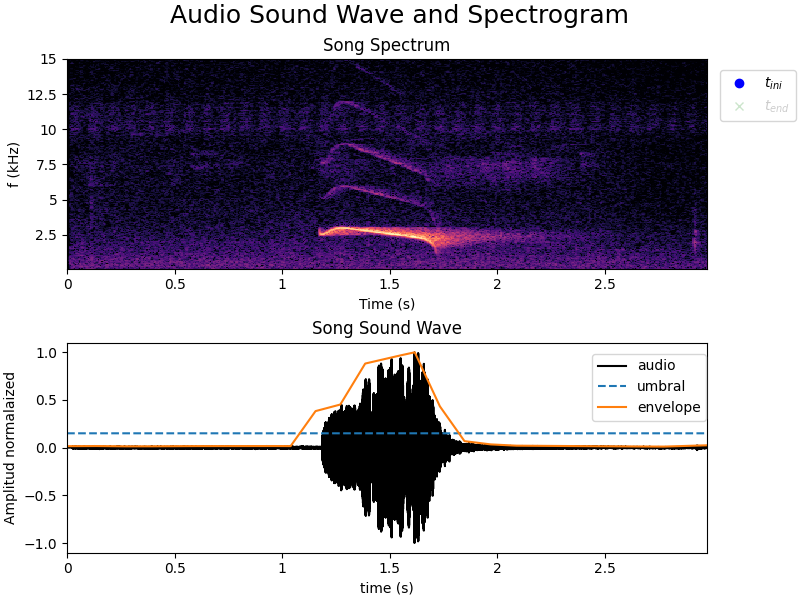

In [3]:
whole_audio = bs.BirdSong(paths, file_id="XC428484" , Nt=5000, flim=(1e2,15e3), 
                           umbral=0.15, NN=1024, tlim=(0,3))
ploter.Plot(whole_audio, FF_on=False, SelectTime_on=True)
AudioPlay(whole_audio)

Define, visualize and hear birdsong. The same funcion allow to us select the time of interest enabling SelectTime_on option

In [5]:
time_interval = np.array([1.1761, 1.7117])
#time_interval = Positions(ploter.klicker)[0]
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

Time interval selected: initial time 1.1761 s, final time 1.7117 s


In [ ]:
# # time_intervals = Positions(klicker)
# #time_intervals

# time_intervals = np.array([[12.66456702, 12.97913565],
#                            [12.99078634, 13.22380014],
#                            [13.29952962, 13.53254342],#]) - 12.5#,,
#                            [13.61701092, 13.81798533],
#                            [14.1063399 , 14.36556776],
#                            [18.5122157 , 18.81979551],
#                            [18.93885867, 19.08603395],
#                            [19.15218015, 19.31093102],
#                            [19.38038453, 19.55567195]])
# #[t[] for t in time_intervals]
# np.int64(time_intervals*complet_bird.fs)

define the song by a time interval, interval of interest from a complete song

### Plot

Visualize the song with the ploter object use ploter function Plot and enter the object you want to visualize

The syllable extraction has three methods:

- **amplitud**: 
find where the normalized audio amplitud crosses an umbral, 0.05. 
- **freq**: 
find where the fundamental frequency changes drastically, where the changes is more than 500 Hz.

<!--
 **maad**: use the maad segmentation tools (from scitik-maad) to find Region Of Interest (not implemented yet).
 -->

## Syllable

This is the kernel of the model, the **Syllable** object. This object extract the syllable tempo-spectral features and define the neccesary variables to implement and solve the Motor Gesture. It returns a synthetic syllable as syllable object.


To solve the syllable, find its synthetic syllable from some parameters ($\alpha, \beta, \gamma$), use its method **Solve**. This mehotd dependes of the model parameters $p$, defined in each syllable object, which are $\alpha_i, \beta_i, $ and $\gamma$. Although it is possible to define cutom parameters set, the syllable object has an initial set predefined (it is in the factible region). 

To display the parametres set use the command `Display(object.p)`. To change one of them values use `syllable_object.p["a0"].set(value=value_a0)`.

### Definition

Defining with the Song object. Here is used the bird syllables divider, it requires the syllable number of interest

In [6]:
%%time
no_syllable    = 1 # int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
syllables = whole_audio.Syllables("amplitud")
ploter.Plot(syllable)
#AudioPlay(syllable)

CPU times: total: 0 ns
Wall time: 135 µs


[array([47670, 47671, 47672, ..., 80281, 80282, 80283], dtype=int64)]

define with the Syllable object, ir defines a syllable from an audio bird. You can optionally give a time range for clip the bird audio 

In [ ]:
syl_test = bs.Syllable(clip_bird, tlim=[1.131,1.188], 
                       umbral_FF=1.2, Nt=30, NN=128)
ploter.Plot(syl_test)
AudioPlay(syl_test)

### Solution

In [ ]:
%%time
syllable_synth = syllable.Solve(syllable.p)
syl_test_synth = syl_test.Solve(syl_test.p)

### Synthetic Plots

In [ ]:
# ploter.PlotVs(syllable_synth)
ploter.PlotAlphaBeta(syllable_synth)
ploter.Result(syllable, syllable_synth)
ploter.Plot(syllable_synth)
AudioPlay(syllable_synth)

In [ ]:
# ploter.PlotVs(syl_test_synth)
ploter.PlotAlphaBeta(syl_test_synth)
ploter.Result(syl_test, syl_test_synth)
ploter.Plot(syl_test_synth)
AudioPlay(syl_test_synth)

Syllable variables are visualize with ploter object, here also is measured the time exectuion of the Motor Gesture definition and solution.

One of the biggest advantages of model implementation is the easily parameters exploration, as an example let's use the previous syllable defined but varying the input saic pressure in three levels: low, medium and high.

To plot each object, song or syllable, use the command `ploter.Plot(obj)`.

There is also the posibility to define a syllable object from a time interval and the bird object, nevertheless, you have to define some attribues to the object in order to ploter works fine. Avoid to enter wrong time limits, the object will not be defined. 

To improve the syllable frequency resolution, modify the Short Time Fourier Transform window length but remeber that better frequency resolution implies loss time resolution. This feature is useful when the syllable spectrum is "complex" (trilled syllables).

## Varying Parameters

### Low

$ a_0 = 0.01 $

In [ ]:
%%time
syllable.p["a0"].set(value=0.01)
syllable_synth = syllable.Solve(syllable.p)

# ploter.PlotVs(syllable_synth)
ploter.PlotAlphaBeta(syllable_synth)
ploter.Result(syllable, syllable_synth)

### Medium

$ a_0 = 0.11 $

In [ ]:
syllable.p["a0"].set(value=0.11)
syllable_synth = syllable.Solve(syllable.p)

ploter.PlotAlphaBeta(syllable_synth)
ploter.Result(syllable, syllable_synth)

### High

$ a_0 = 1.25 $

In [ ]:
%%time
syllable.p["a0"].set(value=1.25)
syllable_synth = sesyllable.Solve(syllable.p)

ploter.PlotAlphaBeta(syllable_synth)
ploter.Result(syllable, syllable_synth)

## Chunck

Although the sylalble division is a good approximation to solve the problem, a better methodology is take chuncks of a syllable, divide the syllable in fractions. Since the object syllable is already defined, is worth to use it again to define the **chunck** object. 

The biggest difference with the syllable object is the Fourier Transform window length and envelope parameters. Since these chuncks are smaller than the syllabes the space parameters curves is also smaller.

### Definition

Choose what fraction of the syllable are you interested, `no_chunck`, and define it as a syllable object

In [ ]:
no_chunck = 0 # int(input("Enter the number of song (1 to {0}): ".format(bird.no_chuncks)))
chunck    = clip_bird.Chunck(no_chunck)

ploter.Plot(chunck)
AudioPlay(chunck)

### Solution
Show the parameters used and solve generate the synthetic chunck

In [ ]:
Display(chunck.p)
chunck_synth = chunck.Solve(chunck.p)

# ploter.PlotVs(chunck_synth)
ploter.Plot(chunck_synth)
AudioPlay(chunck_synth)

### Plot Results

Visualize the chunck tempo-spectral features and the scored variables, scored defined to compare real and synthetic syllables 

In [ ]:
ploter.Syllables(chunck, chunck_synth)
ploter.PlotAlphaBeta(chunck_synth)
ploter.Result(chunck, chunck_synth)
AudioPlay(chunck_synth)

## Plot All Objects

Visualize again the song but with the chunck and syllables objects also plotted. The syllable and chunck must be previously defined 

In [ ]:
ploter.Plot(clip_bird, FF_on=True, syllable_on=True, chunck_on=True)

# Optimization Problem

## General Problem

\begin{equation}
\begin{aligned}
\underset{ \gamma \in \mathbb{R},\; \alpha,\beta\in \mathbb{R}^n}{\text{min}} &\qquad  ||\hat{SCI}_{real} - \hat{SCI}_{synt} ( \gamma,\alpha,\beta)||_2  + || (\hat{FF}_{real} - \hat{FF}_{synt}(\gamma,\alpha,\beta)||_2 \\
    & \qquad \qquad  - corr(FC_{real},FC_{synt}(\gamma, \alpha, \beta)) \\
    \text { subject to }  & \qquad \gamma \in \Omega_\gamma, \quad  \beta \in \Omega_\beta ,  \quad  \alpha \in \Omega_\alpha
\end{aligned}
\end{equation}

with $\Omega_\gamma , \Omega_\alpha$, and $\Omega_\beta$ the known feasible regions for each variable. In order to get an objective function adimensionless the following two variables are define

$$
\hat{SCI} := \frac{SCI}{dim(SCI)} , \qquad
\hat{FF}  := \frac{1}{dim(FF)} \frac{FF}{1 \; KHz}
$$

where $dim()$ is the dimension the corresponding vector. 

## Sub-Optimization Problems

The general problem is computationally expensive since depends on many variables. Although solve the problem of one shot is the ideal method, a better approach is split the general problem in three auxiliar problems

### Optimal $\gamma$

\begin{equation}\label{eq_optimal_gamma}
\begin{aligned}
\underset{ \gamma \in \mathbb{R}}{\text{min}} &\qquad   || \hat{SCI}_{real} - \hat{SCI}_{synt} ( \gamma)||_2  + || \hat{FF}_{real} - \hat{FF}_{synt}(\gamma)||_2\\
    \text { subject to }  & \qquad  \;   \gamma \in \Gamma_\gamma = [10000, 100000]
\end{aligned}
\end{equation}

### Optimal $\alpha$ Coeficients

The coefficients of $\alpha$ are calculated with the spectrum coeffcients correlation between the real syllable and the synthetic one 

\begin{equation}\label{optimal_a_min}
\begin{aligned}
\underset{a \in \mathbb{R}^3}{\text{min}} &  \qquad - corr (real, synthetic(a))  \\
    \text { subject to }  & a\in\Omega_a
\end{aligned}
\end{equation}

### Optimal $\beta$ Coeficients

The last step is to find the beta coefficients $b_i$

\begin{equation}\label{optimal_b}
\begin{aligned}
\underset{b \in \mathbb{R}^3}{\text{min}} &\qquad || FF_{real} - FF_{synt} (b)||  \\
    \text { subject to }  & \qquad \; b \in \Omega_b
\end{aligned}
\end{equation}

with $t\in [0,T]$ where $T$ is the duration of the sillable (chunck).


The air-sac pressure and labial tension are defined by six coefficients, 3 coefficients each one, this means their time curves are parabolic functions (the motor gestures are parabolas) but this can be modify but ommiting the third coefficients $a_2, b_2$ and working with lines curves as a motor gestures.

## Optimization Solvers

Define the method and its parameters to solve the optimization problem

In [ ]:
brute         = {'method':'brute', 'Ns':11} #, 'workers':-1} 
DualAnnealing = {'method':'dual_annealing','max_nfev':200, 'maxiter': 100}

Define the object to optimize and its corresponding optimizer

In [ ]:
obj       = syl_test # syllable # chunck
optimizer = bs.Optimizer(obj, method_kwargs=brute)

In [ ]:
obj.id

In [ ]:
ploter.Plot(obj)
AudioPlay(obj)

You can check all the methods availables uncommenting the following line, check the **method** attribute

In [ ]:
#?lmfit.minimize

### Initial Synthetic Syllable

Show model parameters and plots of the inital synthetic syllable

In [ ]:
Display(obj.p)
obj_synth = obj.Solve(obj.p)

ploter.PlotAlphaBeta(obj_synth)
ploter.Result(obj, obj_synth)
AudioPlay(obj_synth)

# Solution

## Optimal $\gamma$

Find the optimal time constant parameter ($\gamma^*$) by solving the first suboptimization problem for each syllable.

In [ ]:
Gammas = optimizer.AllGammas(clip_bird)
#optimizer.OptimalGamma(syl_test_synth)

Altough the optimal parameters are stores in the optimizer, it is recommend to save this value in the object parameters set 

In [ ]:
obj.p = optimizer.obj.p
optimizer.optimal_gamma

### Plot 

Show parameter set, solve the object with this parameters, and visualize synthetic syllable

In [ ]:
obj.id

In [ ]:
Display(obj.p)
obj_synth = obj.Solve(obj.p)

ploter.PlotAlphaBeta(obj_synth)
ploter.Result(obj, obj_synth)
AudioPlay(obj_synth)

## Optimal Parameters $\alpha_i$ and $\beta_i$

Dependeing of what gesture approximation are you interested (linear or quadratic curves for $\alpha$ or $\beta$), the optimizer object find the optimal parameteres using its `OptimalVariable` method 

In [ ]:
# optimizer.OptimalAs(obj)
# optimizer.OptimalBs(obj)

optimizer.OptimalParams(obj, Ns=11)

### Optimal Parameters

In [ ]:
Display(obj.p)

One shot solving is also implemented but the execution is very slow, since the parameter space has a dimension of at least 5 parameters.

In [ ]:
# optimizer.OptimalParameters()
# Display(obj.p)

Finding optimal $\gamma$, $b_0$, and $b_1$ by the brute method

### Plot Best Syllable

Solve and visualize the optimal synthetic syllable and its features

In [ ]:
#Display(obj.p)
obj_synth_optimal = obj.Solve(obj.p)

In [ ]:
ploter.Syllables(obj, obj_synth_optimal)

In [ ]:
# ploter.PlotVs(obj_synth_optimal)
ploter.PlotAlphaBeta(obj_synth_optimal)
ploter.Result(obj, obj_synth_optimal)
AudioPlay(obj_synth_optimal)

### Write Audio

The final step is write the audio. To export the syllable in audio format use the syllable method `WriteAudio`

In [ ]:
obj.WriteAudio()
obj_synth.WriteAudio()

# Times

In [ ]:
brute         = {'method':'brute', 'Ns':11} #, 'workers':-1} 

In [ ]:
optimizer_bird = bs.Optimizer(clip_bird, method_kwargs=brute)

In [ ]:
#optimizer_bird.AllGammasByTimes(times)
synth_bird = optimizer_bird.SongByTimes(time_intervals)

In [ ]:
# # # plt.plot(complet_bird.time_s, optimizer_bird.synth_bird_s)
# # # plt.xlim((12, 14))

# #plt.plot(optimizer_bird.synth_bird_s)

# synth_bird = bs.Song(complet_bird.paths, complet_bird.no_file, 
#                      sfs=[optimizer_bird.synth_bird_s, complet_bird.fs],
#                     split_method="amplitud", umbral=-1.01)

# # #optimizer_bird.obj0.id

In [ ]:
ploter.Plot(clip_bird)
AudioPlay(clip_bird)

In [ ]:
optimizer_bird.synth_bird.id

In [ ]:
#synth_bird.id = "song-synth"
ploter.Plot(optimizer_bird.synth_bird)
AudioPlay(optimizer_bird.synth_bird)

In [ ]:
clip_bird.WriteAudio()
optimizer_bird.synth_bird.WriteAudio()

In [ ]:
# plt.plot(synth_bird.betas_bird)

In [ ]:
# AudioPlay(synth_bird)

## Whole Song

This function attends to solve all the song, it calculates the optimal gamma and find the optimal parameters for each syllable

In [ ]:
# bird.WholeSong(brute, plot=True, syll_max=0)